<a href="https://colab.research.google.com/github/Letch49/ML-vvsu-2025-2026/blob/master/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pyexpat import features
!pip install pandas seaborn scikit-learn

# Домашнее задание про практике 2

- Провести разведочный анализ EDA (описать полученный результат). Тут важно, влияет ли X[i] на Y (примеры в практике 2)
- Описать полученный результат относительно анализа целевой перменной и зависимой (см. практика 2)
- Подобороться с пропусками в данных (при наличии в датасете). Объяснить способ выборка борьбы с пропуском
- Обучить модель линейной регресии на всей выборке X, y. Вывести метрики
- Сделать train_test_split и обучить на обучающей выборке. Предсказать результат на обучающей и тестовой выборках. Вывести метрики, объяснить полученный результат

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('student_performance.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column                   Non-Null Count    Dtype   
---  ------                   --------------    -----   
 0   student_id               1000000 non-null  int64   
 1   weekly_self_study_hours  1000000 non-null  float64 
 2   attendance_percentage    1000000 non-null  float64 
 3   class_participation      1000000 non-null  float64 
 4   total_score              1000000 non-null  float64 
 5   grade                    1000000 non-null  category
dtypes: category(1), float64(4), int64(1)
memory usage: 39.1 MB


In [10]:
# преобразовать категориальные признаки в category
df['grade'] = df.grade.astype('category')

In [38]:
# выбрать целевую переменную и разделить на X, y
# целевая переменная - числовой непрерывный признак

y = df.weekly_self_study_hours
X = df.drop(['weekly_self_study_hours', 'student_id'], axis=1)
X

,attendance_percentage,class_participation,total_score,grade
0,95.6,3.8,97.9,A
1,80.0,2.5,83.9,B
2,86.3,5.3,100.0,A
3,70.2,7.0,100.0,A
4,81.9,6.9,92.0,A
...,...,...,...,...
999995,95.5,4.8,100.0,A
999996,82.7,6.7,88.3,A
999997,85.1,5.8,87.9,A
999998,90.0,5.3,100.0,A


## EDA (разведочный анализ относительно целевой переменной)

в этом же блоке побороться с проусками, важно сделать именно после разведочного анализа
- Y и категориальные
- Y и числовые
- Описать все полученные результаты в своем блоке

- Отобрать признаки для дальнейшего анализа, записать в ```best_features```

In [39]:
X.head(n=3)

,attendance_percentage,class_participation,total_score,grade
0,95.6,3.8,97.9,A
1,80.0,2.5,83.9,B
2,86.3,5.3,100.0,A


In [40]:
y.head(n=3)

0    18.5
1    14.0
2    19.5
Name: weekly_self_study_hours, dtype: float64

In [41]:
categorial_features = ['grade'] # перечислить названия колонок с категориальными фичами
numeric_features = ['attendance_percentage', 'class_participation', 'total_score'] # перечислить названия колонок с категориальными фичами??порядковыми
best_features = categorial_features + numeric_features

## Моделирование

**Общая задача:**
Сравнить несколько вариантов линейной регрессии на датасете (с предобработкой признаков: стандартизация числовых, OneHot/Label для категориальных).

**предобработка**
- Категориальные признаки преобразовать с помощью OneHotEncoder (если признак является типом **bool** по логике можно интерпретировать как (true, false) То можно LabelEncoder)
- Числовые признаки записать в `X_scaled` и провести стандартизацию с помощью `StandardScaler`. Желательно без категориальных признаков


---
**Метрики**: (MAE, MAPE, R², MSE, RMSE)

---

**Модель 1.**

- Использовать **все признаки (кроме y)**.
- Обучить на **всей выборке** (без разделения).
- Сделать предсказания на этой же выборке.
- Вывести метрики и интерпретировать.
- Построить график коэффициентов (model.coef\_ vs X\_scaled.columns) и интерпретировать.

---

**Модель 2.**

- Использовать **все признаки**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 3.**

- Использовать только **best\_features** (отобранные признаки).
- Обучить на **всей выборке**.
- Предсказать на всей выборке.
- Вывести метрики качества и интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 4.**

- Использовать **best\_features**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики качества для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

P.S.
- Важно не забывать о стандартизации и разделении категориальных признаков на отдельные олонки
- Все примеры есть в практике 2


P.P.S
Старайтесь делать собственные предположения, ChatGPT задачу решит, но вы не добьетесь понимания полученных результатов

---
В результате должно получиться 4 модели

- первые две на всех колонках (фичах)
- последующие на отобранных фичах (колонках)

## Ниже представлены подсказки, то что нужно использовать и как должно называться

### Преобразование категориальных

In [42]:
# https://habr.com/ru/articles/456294/ - виды Encoder для категориальных признаков
# LabelEncoder, OneHotEncoder
# Label для bool (0,1), (yes, no), (true, false)
# OneHot - для меток

from sklearn.preprocessing import OneHotEncoder # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False → выдаёт DataFrame, а не numpy матрицу
encoded = encoder.fit_transform(X[["grade"]])  # .fit_transfom(X) - обучить и трансформировать, т.е. вернуть результат

In [45]:
encoded_columns = encoder.get_feature_names_out(['grade'])
encoded_columns

array(['grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_F'],
      dtype=object)

In [46]:
X_encoded = pd.DataFrame(encoded, columns=encoded_columns, index=X.index)

In [47]:
X = X.drop('grade', axis=1) if 'grade' in X.columns else X # убираем базовую колонку grade
X = pd.concat([X, X_encoded], axis=1)

In [48]:
X

,attendance_percentage,class_participation,total_score,grade_A,grade_B,grade_C,grade_D,grade_F
0,95.6,3.8,97.9,1.0,0.0,0.0,0.0,0.0
1,80.0,2.5,83.9,0.0,1.0,0.0,0.0,0.0
2,86.3,5.3,100.0,1.0,0.0,0.0,0.0,0.0
3,70.2,7.0,100.0,1.0,0.0,0.0,0.0,0.0
4,81.9,6.9,92.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
999995,95.5,4.8,100.0,1.0,0.0,0.0,0.0,0.0
999996,82.7,6.7,88.3,1.0,0.0,0.0,0.0,0.0
999997,85.1,5.8,87.9,1.0,0.0,0.0,0.0,0.0
999998,90.0,5.3,100.0,1.0,0.0,0.0,0.0,0.0


### Преобразование числовых

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['attendance_percentage', 'class_participation', 'total_score']]) # попробовать избавиться от категориальных. То ест не засовывать такие признаки в стандартизацию
X_scaled

array([[ 1.15543228, -1.11693968,  0.88227753],
       [-0.49989141, -1.78141884, -0.02487179],
       [ 0.16860469, -0.35023296,  1.01834992],
       ...,
       [ 0.0412721 , -0.09466405,  0.23431373],
       [ 0.56121352, -0.35023296,  1.01834992],
       [-0.01178315, -0.96359833,  1.01834992]], shape=(1000000, 3))

### Модель

In [52]:
from sklearn.linear_model import LinearRegression

# model.coef_ - коэфициенты фич (каждый коэф относится по индексу к своей фиче)

model1 = LinearRegression() # модель задачи 1
model1.fit(X, y)
y_pred = model1.predict(X)

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# MAE - средняя абсолютная ошибка, вычисляется по формуле (|y_n-y_p_n|)/n, выдаёт количество баллов, чем меньше, тем лучше
mae = mean_absolute_error(y, y_pred)
print(f'MAE: {mae}')

# MSE - средняя квадратичная ошибка, это как в MAE, но каждое число в числителе возводится в квадрат. В целом более жёсткая оценка, нежели MAE
mse = mean_squared_error(y, y_pred)
print(f'MSE: {mse}')

# R^2 - коэффициент детерминации, оценка того, насколько модель просто лучше среднего, чем значение ближе к 1, тем лучше
r2 = r2_score(y, y_pred)
print(f'R^2: {r2}')

# RMSE - Root Mean Squared Error, корень от MSE, более чувствителен к выбросам, чем ближе к 0, тем лучше
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

# MAPE - Mean Absolute Percentage Error, похоже на MAE, но только в процентах и формула другая, чувствителен к 0
mape = np.mean(np.abs(y - y_pred) / y)*100
print(f'MAPE: {mape}')


MAE: 3.1041767948308263
MSE: 15.591258161133792
R^2: 0.6724670152236689
RMSE: 3.9485767260031546
MAPE: inf


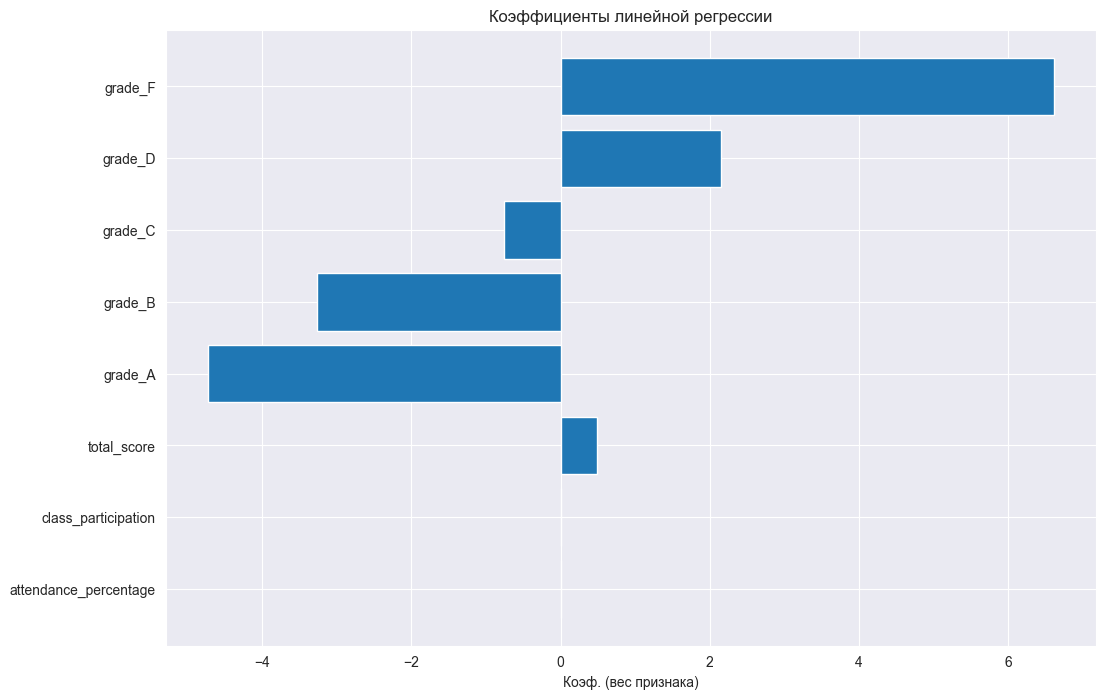

In [55]:
import matplotlib.pyplot as plt

feature_names = X.columns
coefs = model1.coef_

plt.figure(figsize=(12, 8))
plt.barh(feature_names, coefs)
plt.xlabel('Коэф. (вес признака)')
plt.title('Коэффициенты линейной регрессии')
plt.show()

### Разделение на обучающую, тестовую

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # Рездляем данные как 80% - обучение, 20% на тест